## STA 4724: Homework 2 - Due Tuesday, Sep. 24 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Mustaeen Ahmed               

**Your ID:** 5530892

## Question 1
The cost of the maintenance of a certain type of tractor seems to increase with age. The file
*tractor.csv* contains ages (years) and 6-monthly maintenance costs for n = 17 such tractors.

**(a)** Read the data file.

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

dft = pd.read_csv('tractor.csv')

dft.head()

,age,cost
0,4.5,619
1,2.5,1049
2,2.5,1033
3,4.0,495
4,4.0,723


**(b)** Create a scatterplot of tractor maintenance cost versus age.

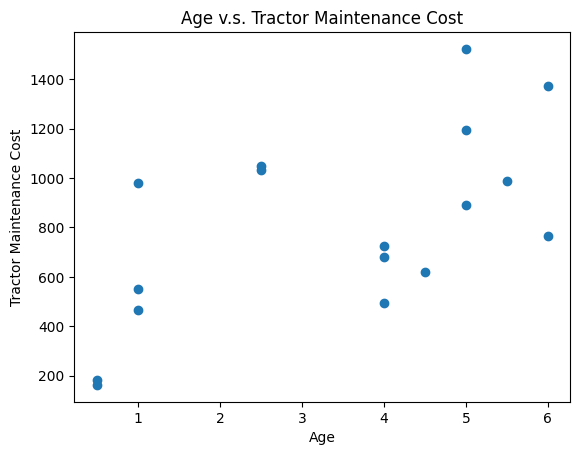

In [248]:
plt.scatter(dft['age'], dft['cost'])
plt.title("Age v.s. Tractor Maintenance Cost")
plt.xlabel("Age")
plt.ylabel("Tractor Maintenance Cost")
plt.show()

**(c)** Using regression to fit the model:
$$\text{cost}=\beta_0+\beta_1 \text{age}$$
in two different ways.

Firstly, use python's bulit-in linear regression solver.

In [249]:
from scipy import stats
X, y = dft['age'], dft['cost']

beta_1, beta_0, r, p, std_err = stats.linregress(X, y)

def calculate(x):
    return beta_0 + beta_1 * x

tractor_model = calculate(X)

Secondly, use close form solution of least square.

In [250]:
import numpy as np
from scipy import linalg

X_matrix = np.vstack([np.ones(len(X)), X]).T

closed_x = linalg.inv(np.dot(X_matrix.T, X_matrix))
closed_y = np.dot(X_matrix.T, y)

beta = np.dot(closed_x, closed_y)

beta_0, beta_1 = beta
print(beta)

plot_y = beta_0 + beta_1 * X

[407.11696718 116.32778548]


**(d)** Add both fitted lines (in different color/style) to the scatterplot. They should give you the same solution.

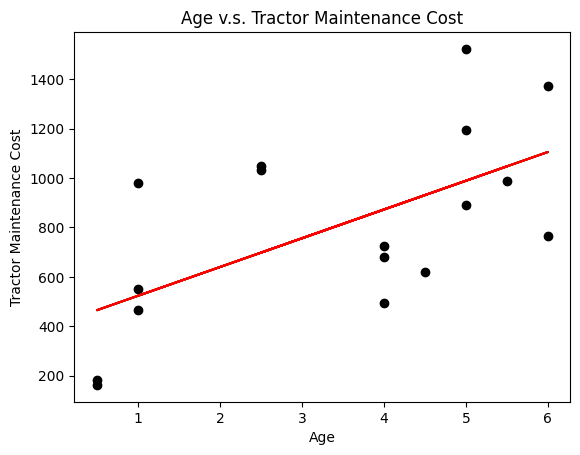

In [251]:
plt.scatter(dft['age'], dft['cost'], label="Data", color="Black")

plt.plot(X, tractor_model, label="Linear Regression", color="Green")
plt.plot(X, plot_y, label="Ordinary Least Squares", color="Red")

plt.title("Age v.s. Tractor Maintenance Cost")
plt.xlabel("Age")
plt.ylabel("Tractor Maintenance Cost")
plt.show()

**(e)** Suppose you are considering buying a tractor  that is three years old, what would you expect your 6-monthly maintenance costs to be?

**Type your answer here**: If I were buying a tractor that is three years old, I would expect my maintenance cost to be around $750 every 6 months.

## Question 2
### Part 1
Let's generate a synthetic dataset for regression! It should have m = 150 data points and each has n = 75 dimensions (features).

**(a)** Set the random seed to be 0.

In [252]:
import numpy as np

np.random.seed(0)

**(b)** Let $X\in\mathbb{R}^{m\times n}$ be a random matrix using *numpy.random.rand()* function.

In [253]:
X = np.random.rand(150, 75)

**(c)** Set the first 10 components of $\hat{\beta}$ to be some random values between $-10$ and $10$, and all the other components to zero. 

Hint: Read what *numpy.random.rand()* generates, and how you generate random numbers in a different interval.

In [254]:
beta_hat = np.zeros(75)
beta_hat[:10] = np.random.rand(10) * 20 - 10

**(d)** Computer $Y=X\hat{\beta}+\varepsilon$ where $\varepsilon\in\mathbb{R}^{m\times 1}$ is a random noise vector generated using *numpy.random.randn()* with mean 0 and standard deviation 0.1.

In [255]:
epsilon = np.random.randn(150) * 0.1

Y = X @ beta_hat + epsilon

Note that the problem we generated here implicitly assume the interception (i.e., $\beta_0$ in textbook) is 0. 

### Part 2
We know the problem we generated above has a sparse solution. So we should solve it with lasso regression. Assume the user has the prior knowledge about the interception is 0. This we don't have to add the column of 1 in front of $X$.

**(a)** Solve the lasso regression problem with $\lambda=0.00001$.

In [256]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1e-5)
lasso_reg.fit(X, Y)

Lasso(alpha=1e-05)

**(b)** Use 10-folder cross validation to find the best regularization parameter between $0$ and $1$.

In [257]:
from sklearn.model_selection import GridSearchCV, KFold

lambda_range = np.linspace(1e-5, 1, 50)
lambda_grid = [{"alpha": lambda_range}]

lasso_reg = Lasso()
cv_lasso = GridSearchCV(estimator=lasso_reg, param_grid=lambda_grid, cv=KFold(n_splits=10))

cv_lasso.fit(X, Y)
best_reg = cv_lasso.best_params_['alpha']
best_reg

1e-05

**(c)** Solve the lasso regression problem again with the best regularization parameter.

In [258]:
lasso_best = Lasso(alpha=best_reg)
lasso_best.fit(X, Y)

beta_est_best = lasso_best.coef_

**(d)** Compare the estimated $\beta_{\text{est}}$ with the ground truth $\hat{\beta}$ by computing $\|\beta_{\text{est}}-\hat{\beta}\|_2$. The distance should be small.

In [259]:
euclidean_norm = linalg.norm(beta_est_best - beta_hat)
euclidean_norm

0.31206580739929163

## Question 3
In 1988, US cattle producers voted on whether or not to each pay a dollar per head towards the marketing campaigns of the American Beef Council. To understand the vote results, the Montana state cattlemen's association looked at the effect of the physical size of the farm and the value of the farms' gross revenue on voter preference. *beef.csv* consist of the vote results (YES in %), average SIZE of farm (in hundred acres), and average VAL of products sold annually by each farm (in thousand dollors) for each of Montana’s 56 counties.

**(a)** Read the data file.

In [260]:
dfb = pd.read_csv('beef.csv')
dfb.head()

,YES,SIZE,VAL
0,85.9,45.2,122
1,65.0,58.5,121
2,74.9,52.5,81
3,72.5,24.0,74
4,76.6,10.5,54


**(b)** Use Multivariate Linear Regression to fit YES with SIZE and log(VAL) as the regressors.

In [261]:
from sklearn.linear_model import LinearRegression

X = dfb[['SIZE', 'VAL']].copy()
y = dfb['YES']

X['logVAL'] = np.log(X['VAL'])
X = X[['SIZE', 'logVAL']]

model = LinearRegression()
model.fit(X, y)

beta_0, beta_1 = model.coef_
model.intercept_, beta_0, beta_1

(93.71444907992176, -0.24275005714629475, -2.3861431856280064)

**(c)** Is this a good fit? Numerically check via a sutiable statistics test.

In [262]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    YES   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              569.1
Date:                Tue, 30 Sep 2025   Prob (F-statistic):                    5.18e-37
Time:                        00:31:20   Log-Likelihood:                         -236.36
No. Observations:                  56   AIC:                                      476.7
Df Residuals:                      54   BIC:                                      480.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SIZE          -0.6030      0.127     -4.735      0.000      -0.858      -0.348
logVAL        23.0450      1.150     20.040      0.000      20.739      25.351
==============================================================================
Omnibus:                        8.251   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.462
Skew:                           0.792   Prob(JB):                       0.0240
Kurtosis:                       3.831   Cond. No.                         19.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on the r-squared value of 0.955, and very low p-value, we can determine that this dataset is a good fit.**

**(d)** In this dataset, what fact may potentially be a probelm for our regression analysis?

Hint: Does the effect of SIZE change depending on log(VAL)?

**Type your answer here**: In the event that SIZE and VAL are correlated, this fact will be a problem, as we cannot tell which variable is influencing our result.